# Cuaderno de Notas de Métodos Numéricos
## Interpolación: motivación y preliminares
### Prof. Jorge I. Zuluaga


#### Ejecutarme siempre

A continuación descargamos en el espacio virtual de este cuaderno todos los archivos necesarios para que las notas del curso funcionen bien:

In [ ]:
!git clone https://github.com/JorgeZuluaga/NotasMetodosNumericos
!ln -s NotasMetodosNumericos mn
!make -C mn pull

Cloning into 'NotasMetodosNumericos'...
remote: Enumerating objects: 108, done.
remote: Counting objects: 100% (108/108), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 108 (delta 46), reused 82 (delta 20), pack-reused 0
Receiving objects: 100% (108/108), 8.53 MiB | 19.32 MiB/s, done.
Resolving deltas: 100% (46/46), done.
make: Entering directory '/content/NotasMetodosNumericos'
git reset --hard HEAD
HEAD is now at 876de31 Commit
git pull origin master
From https://github.com/JorgeZuluaga/NotasMetodosNumericos
 * branch            master     -> FETCH_HEAD
Already up to date.
make: Leaving directory '/content/NotasMetodosNumericos'


## Un vistazo de la clase

  Qué veremos en esta clase:

  - El método de Newton.
  - Expresiones simbólicas en Python.
  - El método de la secante.

  Para leer en el libro: sección 2.3 "Método de Newton y sus extensiones".

## Motivación

- Cunado construimos modelos matemáticos o físicos, estamos acostumbrados a disponer de información detallada sobre las funciones que están implicadas en nuestros modelos.

- Por ejemplo, la altura de una pelota de Basket que es lanzada desde una altura $h$, con una velocidad inicial $v$ en un ángulo $\theta$ está dada por la **función continua**:

  $$
  y(t) = h + v t \sin \theta - \frac{1}{2}g t^2
  $$

- Esta función es provista por un modelo físico.  No es la función real, la que describe el fenómeno en el mundo allá afuera, que puede ser mucho más complicada y tal vez imposible de conocer.  Pero es una función útil para estudiar el fenómeno.

- Como es una función continua podemos realizar sobre ella las operaciones propias del cálculo, límites, derivación, integración, etc.  Incluso podemos usar esa función para encontrar sus raíces con los métodos vistos antes en el curso.

- Pero hay situaciones en las que no se dispone de una función exacta:

  - Durante la pandemia del Coronavirus se tomaron datos del número de personas $i(t)$ que resultaban contagiadas en un día específico.  Sin embargo no se sabe el valor de las personas contagiadas en cualquier instante de tiempo $t$ (a cualquier hora y en cualquier día).

  <center>
  <img src="https://raw.githubusercontent.com/JorgeZuluaga/NotasMetodosNumericos/master/figuras/datos-coronavirus.png" width=500>
  </center>

  - La tasa de cambio de una divisa a otra $D(t)$ puede cambiar en cada instante de tiempo, pero la verdad es que solo se publica el valor de esa tasa en momentos específicos de cada día.

  - La temperatura $T(t)$ en un lugar específico del planeta se puede medir en cada instante del tiempo, pero en realidad solo se publica su valor cada cierto intervalo de tiempo.

- La pregunta básica que intentaremos responder en esta parte del curso es:  ¿Cómo podemos estimar el valor de una función en cualquier punto en un intervalo dado, si solo sabemos su valor en unos pocos puntos de ese mismo intervalo?

- En palabras más precisas: ¿cómo construir una función continua $P(x)$ que aproxime de la mejor manera posible un función desconocida $f(x)$ para la cuál solo se conocen solo valores discretos $f(x_1)$, $f(x_2)$, $f(x_3)$, etc.?

- A este problema se lo conoce como la **aproximación de una función** y en esta parte del curso estudiaremos uno de los métodos para aproximar funciones conocido como **interpolación**.
  


## Interpolación Polinomial

- Uno de los métodos más utilizados para aproximar una función es el **método de interpolación polinomial**.  

- En el método de interpolación polinomial se pretende encontrar un polinomio o conjunto de *polinomios algebraicos*, que son funciones de la forma:

  $$
  P_{n}(x)=a_{n} x^{n}+a_{n-1} x^{n-1}+\cdots+a_{1} x+a_{0}
  $$

  tal que se cumpla que para un conjunto de $n+1$ valores $\{x_0, x_1, x_2, \cdots, x_n\}$ en un intervalo $[a,b]$ se cumpla, como mínimo que:

  $$
  f(x_i)=P(x_i)
  $$

- En la figura abajo se ilustra el objetivo buscado:

<center>
  <img src="https://raw.githubusercontent.com/JorgeZuluaga/NotasMetodosNumericos/master/figuras/interpolacion-polinomial.png" width=500>
  </center>

- Al polinomio $P(x)$ (o conjunto de polinomios), se lo conoce como **polinomio interpolante**.

### Interpolación lineal

- Aunque el problema de la interpolación polinomial puede parecer intimidante, existe una solución muy simple que usamos con mucha frecuencia: la **interpolación lineal**.

- En la interpolación lineal se aproxima el valor de una función entre dos puntos, una línea recta (ver figura abajo).  Es decir en este caso el polinomio interpolante es de la forma:

  $$
  P_1(x) = m x + b
  $$
  donde $m$ es la pendiente de la recta y $b$ su intercepto.

  <center>
  <img src="https://raw.githubusercontent.com/JorgeZuluaga/NotasMetodosNumericos/master/figuras/interpolacion-lineal.png" width=500>
  </center>

- La pendiente de la reta que hay entre dos puntos $f(x_1)$ y $f(x_0)$ esta dada por:

  $$
  m = \frac{f(x_1) - f(x_0)}{x_1-x_0}
  $$

- Cualquier punto intermedio de la recta debe cumplir la misma condición:

  $$
  m = \frac{P_1(x) - f(x_0)}{x-x_0}
  $$

- Esto implica que el valor del polinomio en cualquier $x$ cumple la condición:

  $$
  \frac{P_1(x) - f(x_0)}{x-x_0} = \frac{f(x_1) - f(x_0)}{x_1-x_0}
  $$

- Si despejamos $P(x)$ podemos escribir:

  $$
  P_1(x) = \frac{x-x_1}{x_0-x_1} f(x_0) + \frac{x-x_0}{x_1-x_0} f(x_1)
  $$

- Varias características de está fórmula:

  - Nótese que el valor del polinomio en $x$ solo depende de cantidades conocidas, $x_0$, $x_1$, $f(x_0)$, $f(x_1)$. 

  - El polinomio puede escribirse también de la forma:

   $$
   P_1(x) = L_{1,0}(x) f(x_0) + L_{1,1}(x) f(x_1)
   $$

  - Los *coeficientes* que multiplican al valor de la función en cada punto reciben el conveniente nombre de $L_{1,i}$, donde el primer número en el subíndice se refiere al hecho de que estás fórmulas son para la interpolación lineal (polinomio de orden 1) y el segundo corresponde al punto en el que el polinomio es evaluado.
  
  - Las fórmulas de estos coeficientes son:

   $$
   L_{1,0}(x)=\frac{x-x_1}{x_0-x_1}
   $$
   $$
   L_{1,1}(x)=\frac{x-x_0}{x_1-x_0}
   $$

  - Una forma general en la que se pueden escribir estos coeficientes es:

   $$
   L_{1,i}=\frac{x-x_j}{x_i-x_j}
   $$
    
    nótese que en el numerador se usa el mismo $x$ del índice del coeficiente.  En el denominador se saca la diferencia entre los dos valores de $x$ pero en un orden específico.

### Un ejemplo en Python de Interpolación Lineal

- Imaginemos que tenemos la temperatura 

In [1]:
import pandas as pd

In [3]:
pd.read_csv("dataexport_20220328T135211.csv",comment="#")

,location,Medellín,Medellín.1,Medellín.2
0,lat,6.25154,6.25154,6.25154
1,lon,-75.54994,-75.54994,-75.54994
2,asl,2043.341,2043.341,2043.341
3,variable,Temperature,Temperature,Temperature
4,unit,°C,°C,°C
5,level,2 m elevation corrected,2 m elevation corrected,2 m elevation corrected
6,resolution,daily,daily,daily
7,aggregation,Maximum,Minimum,Mean
8,timestamp,Medellín Temperature [2 m elevation corrected],Medellín Temperature [2 m elevation corrected],Medellín Temperature [2 m elevation corrected]
9,20220314T0000,23.679214,15.639214,19.204214


In [ ]:
import sympy as sp

x,y,g,L,alpha,p0=sp.symbols("x y g L alpha p_0")

In [ ]:
p0

p_0

- Ahora la variable `x` puede ser usada para construir expresiones algebraicas en lugar de para calcular numéricamente cosas.  Por ejemplo se puede construir un polinomio:

In [ ]:
x**2+2*x+1

x**2 + 2*x + 1

- A esto se lo llama una *expresión* y es importante entender que no representa una variable convencional de Python con la que podemos hacer operaciones numéricas tradicionales.

- Las expresiones pueden almacenarse en variables:

In [ ]:
p=x**2+2*x+1
p

x**2 + 2*x + 1

- Y estas nuevas *variables* operarse para obtener nuevas expresiones:

In [ ]:
p**2

(x**2 + 2*x + 1)**2

- El poder de `SymPy` está en la capacidad de convertir expresiones simbólicas en otras expresiones más desarrolladas.  Por ejemplo, la expresión anterior se puede desarrollar rompiendo los paréntesis:

In [ ]:
sp.expand(p**2)

x**4 + 4*x**3 + 6*x**2 + 4*x + 1

- O el polinomio original se puede factorizar:

In [ ]:
sp.factor(p)

(x + 1)**2

### Cálculo con SymPy

- Es posible realizar derivadas e integrales en SymPy facilitando en muchas ocasiones la solución a problemas complejos.

- Por ejemplo, para encontrar la derivada de la función $f(x)=\cos x - x$ se usa el siguiente código:

In [ ]:
sp.diff(sp.cos(x)-x,x)

-sin(x) - 1

- Nótese el uso de la función `sp.cos` que es la versión simbólica de la función numérica `np.cos`. Por casi cada función numérica de NumPy existe una contraparte simbólica.

- La versatilidad de `SymPy` se pone a prueba para hacer operaciones laboriosas, como obtener la derivada cuarta de la función anterior:

In [ ]:
f=sp.cos(x)-x
sp.diff(f,x,74)

-cos(x)

- Igualmente se pueden hacer integrales como esta:

  $$
  \int x e^x dx
  $$

In [ ]:
f=x*sp.exp(x)
sp.integrate(f,x)

(x - 1)*exp(x)

- O integrales definidas como esta:

  $$
  \int_0^{\pi/4} \frac{dx}{\sqrt{1-x^2}}
  $$

In [ ]:
f=1/sp.sqrt(1-x**2)
sp.integrate(f,(x,0,sp.pi/4))

asin(pi/4)

- En el último caso puede ser necesario tener el valor numérico del resultado.  Para ello se usa la función `sp.N` así:

In [ ]:
f=1/sp.sqrt(1-x**2)
I=sp.integrate(f,(x,0,sp.pi/4))
sp.N(I)

0.903339110766513

### Conversión de funciones simbólicas en funciones numéricas

- En ocasiones puede ser interesante para nosotros convertir el resultado de una operación muy complicada, en una función numérica.

- Un ejemplo muy obvio se da justamente con el método de Newton, en el que para realizar el procedimiento se necesita una derivada.

- Siempre que se tiene una expresión se puede obtener una versión numérica usando la función `sp.lambdify`:

In [ ]:
expresion=x**2+2*x+1
funcion=sp.lambdify(x,expresion)

- La función ahora puede usarse como una función numérica convencional:

In [ ]:
expresion(1)

NameError: ignored

In [ ]:
funcion(1)

4

- Aplicando este truco podemos implementar el método de Newton para funciones complicadas usando un procedimiento similar al ejemplo a continuación:

  $$
  f(x)=e^x + 2^{-x} + 2 \cos x - 6 
  $$

In [ ]:
x=sp.symbols("x")
#La función
f_simbolica=sp.exp(x)+2**(-x)+2*sp.cos(x)-6
#Su derivada
fp_simbolica=sp.diff(f_simbolica,x)

fp_simbolica

exp(x) - 2*sin(x) - 2**(-x)*log(2)

- Ahora convertimos estas expresiones simbólicas en funciones:

In [ ]:
f=sp.lambdify(x,f_simbolica)
fp=sp.lambdify(x,fp_simbolica)

- Utilizamos estas funciones con la rutina de Newton:

In [ ]:
metodo_newton_burden(f,fp,1.5,1e-5,100)

(5, 1.829383601933849)

Otro ejemplo:

$$
f(x)=\ln (x-1) + \cos(x-1)
$$

In [ ]:
import sympy as sp
import numpy as np

x=sp.symbols("x")
f_sim=sp.log(x-1)+sp.cos(x-1)
fp_sim=sp.diff(f_sim,x)

f=sp.lambdify(x,f_sim)
fp=sp.lambdify(x,fp_sim)
              
metodo_newton_burden(f,fp,1.5,1e-5,100)

(4, 1.3977484759580519)

## Método de la secante

- En algunas situaciones puede ser muy difícil, incluso imposible obtener una expresión matemática para la derivada.  En ese caso se puede usar una fórmula aproximada para la derivada.

- Sabemos que si tenemos dos valores muy próximos $p_{n-1}$ y $p_{n-2}$ de una variable, la derivada de la función en $p_{n-1}$ se puede aproximar como:

  $$
  f^{\prime}\left(p_{n-1}\right) \approx \frac{f\left(p_{n-2}\right)-f\left(p_{n-1}\right)}{p_{n-2}-p_{n-1}}
  $$

- Usando este hecho, la fórmula de recurrencia del método de Newton-Raphson:

  $$
  p_n = p_{n-1}-\frac{f\left(p_{n-1}\right)}{f'\left(p_{n-1}\right)}
  $$
  se puede escribir, reemplazando $f'\left(p_{n-1}\right)$ como:

  $$
  p_{n}=p_{n-1}-\frac{f\left(p_{n-1}\right)\left(p_{n-1}-p_{n-2}\right)}{f\left(p_{n-1}\right)-f\left(p_{n-2}\right)}
  $$

- Aunque esta sea una expresión mucho más elaborada, solo necesita la función y no la derivada.

- A la aplicación de esta fórmula se lo conoce como el **método de la secante**.

- Una característica peculiar del método de la secante es que para comenzar a usarlo necesitamos dos valores iniciales, $p_0$ y $p_1$ en lugar de un solo valor.

- Una representación gráfica del método de la secante se muestra en la figura a continuación:

  <center>
  <img src="https://raw.githubusercontent.com/JorgeZuluaga/NotasMetodosNumericos/master/figuras/metodo-secante.png" width=500>
  </center>

### Algoritmos del método de la secante

- El método de la secante es casi idéntico al método de Newton cambiando solamente la fórmula de recurrencia:

  <center>
  <img src="https://raw.githubusercontent.com/JorgeZuluaga/NotasMetodosNumericos/master/figuras/algoritmo-metodo-secante.png" width=500>
  </center>

In [ ]:
def metodo_secante_burden(f,p0,p1,TOL,N0):
  #Paso 1
  i=2
  q0=f(p0)
  q1=f(p1)
  #Paso 2
  while i<=N0:
      #Paso 3
      p = p1 - q1*(p1-p0)/(q1-q0)
      print(p)
      #Paso 4
      if abs(p-p0)<TOL:
        return i,p
      #Paso 5
      i = i + 1
      #Paso 6
      p0=p1
      q0=q1
      p1=p
      q1=f(p) 

  print(f"El método fallo después de {N0} iteraciones con un último valor p = {p}")

In [ ]:
def f(x):
  fx=np.log(x)
  return fx

metodo_secante_burden(f,2,3,1e-3,100)

0.2904887086485459
1.7250733451850448
1.2859754793784188
0.9100092929423269
1.0125308057096742
1.0005715181946215
0.9999964269811359
1.000000001020926


(9, 1.000000001020926)

- Ahora podemos aplicar este algoritmo al problema que teníamos antes:

In [ ]:
def f(x):
  fx=np.cos(x)-x
  return fx

metodo_secante_burden(f,0.7,0.8,1e-5,100)

(5, 0.7390851332151595)

## Problema de aplicación

- **Problema 27, Libro de Burden**. 

  - El jugador A dejará fuera (ganará por una puntuación de 21-0) al jugador $\mathrm{B}$ en un juego de ráquetbol con probabilidad
   
   $$
   P=\frac{1+p}{2}\left(\frac{p}{1-p+p^{2}}\right)^{21}
   $$

   donde $p$ denota la probabilidad de que A ganará cualquier rally específico (independientemente del servicio). (Consulte [Keller, J], p. 267). Determine, dentro de $10^{-3}$, el valor mínimo de $p$ que garantice que $\mathrm{A}$ dejará fuera $\mathrm{a} \mathrm{B}$ en por lo menos la mitad de los partidos que jueguen.

- **Solución**:

  - Para que el jugador A le gane la mitad de las veces al jugador B, la probabilidad debe ser $P=0.5$.  Así que la ecuación que tenemos que resolver es:

   $$
   0.5=\frac{1+p}{2}\left(\frac{p}{1-p+p^{2}}\right)^{21}
   $$

  - Identificamos nuestra variable $x$ como el valor de $p$

  - La función será entonces:

   $$
   f(x)=\frac{1+x}{2}\left(\frac{x}{1-x+x^{2}}\right)^{21}-0.5
   $$

  - Vamos a usar `SymPy` para ayudarnos en la solución a este problema:

In [ ]:
import sympy as sp
x=sp.symbols("x")
#La función
f_simbolica=(1+x)/2*(x/(1-x+x**2))**21-0.5
#Su derivada
fp_simbolica=sp.diff(f_simbolica,x)

#Versiones numéricas
f=sp.lambdify(x,f_simbolica)
fp=sp.lambdify(x,fp_simbolica)

- **Solución (continuación)**:

  - Es bueno hacer un gráfico para encontrar los puntos de intersección:

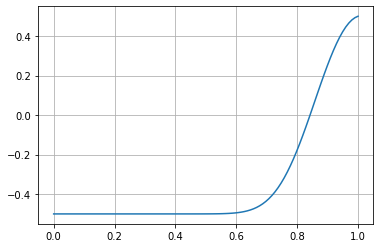

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

p=np.linspace(0,1,100)
plt.plot(p,f(p))
plt.grid()

- Vemos que podemos aplicar tanto el método de Newton como el de la secante usando por ejemplo $p_0=0.8$:

In [ ]:
metodo_newton_burden(f,fp,0.8,1e-3,100)

(3, 0.8423047911258579)

In [ ]:
metodo_secante_burden(f,0.8,0.9,1e-3,100)

(5, 0.8423047910354196)

- Observamos que el método de Newton es mucho más rápido (solo necesita 3 iteraciones) para encontrar la solución con la tolerancia solicitada.


## Continuará...

## Ejercicios

- Investigar cómo se puede hacer una expansión en series de Taylor usando `SymPy`. 

- Hacer la expansión en series de Taylor de la función $\cos(x)$.

-----
*Fin*